In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from scipy.special import expit

In [2]:
def function(x):
    nof=2
    nov=2
    sol=np.empty(nof)
    sol[0]=4*x[0]**2+4*x[1]**2
    sol[1]=(x[0]-5)**2+(x[1]-5)**2
    return sol
xmax=np.array([5,3])
xmin=np.array([0,0])

In [3]:
def res(x):
    g1=(x[0]-5)**2+x[1]**2
    g2=(x[0]-8)**2+(x[1]+3)**2
    #print(g1, g2) 
    if g1<=25 and g2>=7.7:
        estatus=True
    else:
        estatus=False
    return estatus

In [4]:
def isdomina(x_i, x_j):
    f_i=function(x_i)
    f_j=function(x_j)
    nof=f_j.size
    flagless=0
    flagequal=0
    aux=None
    for i in range(nof):
        if f_i[i]<f_j[i]:
            flagless=flagless+1
        elif f_j[i]==f_i[i]:
            flagequal=flagequal+1
    if flagless+flagequal ==nof and flagless>0: #se sim o domina o corrente
        aux=True
    else:
        aux=False
    return aux

In [5]:
def iarch(HL, SL, nov):
    x_j=np.empty([nov])
    archive=np.empty([0,nov])
    x_i=np.random.rand(nov)
    lines=0
    r=0
    while lines<(SL*2):
        for i in range(0,nov):
            x_j[i]=np.random.uniform(low=xmin[i], high=xmax[i], size=None)
        if (res(x_j)) and isdomina(x_i, x_j) or r>20 :
            archive=np.vstack([archive, x_j])
            r=0
            lines=lines+1
        else:
            r= r+1
    return archive

def newsol(x_i, C, delr):
    x_j=np.array(x_i.size)
    es=0
    while es==0:
        rand=np.random.choice(np.arange(x_i.size))
        u=0
        for i in range(C[rand]):
            u=u+np.random.uniform(high=0.5, low=-0.5, size=None)
        delta=u/C[rand]*delr*np.random.choice([-1,1])
        print(delta)
        for i in range(x_i.size):
            if i==rand:
                x_j[i]=x_i[i]+delta
            else:
                x_j[i]=x_i[i]
                
        
            
        if res(x_j):
            es=1
        else:
            es=0
    return x_j

In [6]:
def newsol(x, C, delr, ind):
    u=0
    cont=0
    xj=np.zeros(x.size)
    #ind=np.random.choice(np.arange(C.size))
    while cont<=C[ind]:
        u=u+np.random.uniform(low=-0.5, high=0.5, size=None)
        cont=cont+1
    delta=u/C[ind]*delr*np.random.choice([-1,1])
    #print("delta=", delta)
    for i in range(x.size):
        if i != ind:
            xj[i]=x[i]
            #print(xj)
        else:
            xj[i]=x[i]+delta
            #print(xj)
    return xj

In [7]:
def maxmin(sol):
    nof=sol.shape[1]
    R=np.empty(nof)
    for i in range(0,nof):
        R[i]=max(sol[i])-min(sol[i])
    return R 

def delws(archive, sol, nof, SL):
    nov=archive.shape[1]
    print(nov)
    newarchive=np.empty([0,nov])
    size=archive.shape[0]
    lines=0
    flag=np.empty(archive.shape[0])
    cont=0
    while lines<size:
        for i in range(0,size): 
            if lines != i:
                k=0
                kc=0
                for col in range(nof):
                    if sol[lines][col]<sol[i][col]:
                        k=k+1
                    else:
                        kc=kc+1
                if kc==2: # a solução [linha] foi dominado por i
                    flag[lines]=True #verdadeiro para os que foi dominado por alguma soluço
                    cont+=1
                else: 
                    flag[lines]=True
        lines=lines+1
    #print("flag conculido")
    if cont>0:
        for i in range(archive.shape[0]):
            if flag[i]==False:
                newarchive=np.vstack([newarchive, archive[i]])
                #print("adicionado")
    else:
        print("é insuficiente")
    #se ainda não é o suficiente pega valor aleatórios 
    while newarchive.shape[0]<SL/2:
        ind=np.random.choice(np.arange(archive.shape[0]))
        #print(ind)
        newarchive=np.vstack([newarchive, archive[ind]])
        
    return newarchive

In [8]:
def delws(archive, sol, nof):
    nov=archive.shape[1]
    newarchive=np.empty([0,nov])
    size=archive.shape[0]
    lines=0
    flag=np.empty(archive.shape[0])
    while lines<size:
        for i in range(0,size): 
            if lines != i:
                cont=0
                k=0
                for col in range(0,nof): #verifica se é dominado ou não
                    if sol[lines][col]<sol[i][col]:
                        cont=cont+1
                    else:
                        k=k+1
                if k==2:
                    flag[lines]=False
                    break
                else: 
                    flag[lines]=True
        lines=lines+1
    for l in range(archive.shape[0]):
        if flag[l]:
             newarchive=np.vstack([newarchive, archive[l]])
    return newarchive

In [9]:
def clust(size, archive):
    nof=archive.shape[1]
    while archive.shape[0]>size:
        linhas=archive.shape[0]
        mm=np.empty(linhas)
        deli=0
        for u in range(1,linhas):
            mm[u-1]=np.sqrt((archive[u-1][0]-archive[u][0])**2+(archive[u-1][1]-archive[u][1])**2)
        diff=800
        ind=0
        for i in range(0, mm.size):
            if mm[i]<diff:
                diff=mm[i]
                ind=i
        #ind=np.argmin(mm)
        if ind!=0 and ind!=(mm.size-1):
            if mm[ind+1]<= mm[ind-1]:
                deli=ind+1
            elif mm[ind-1]<=mm[ind+1]:
                deli=ind
        elif ind==(mm.size-1):
            #lista=np.append(lista, ind-1)
            deli=ind-1
        else:
            #lista=np.append(lista, ind+1)
            deli=ind+1  
        archive=np.delete(archive, deli, axis=0)   
            
    return archive

In [10]:
def inc(x, archive):
    aux=None
    for i in range(archive.shape[0]):
        j=0
        for col in range(0,archive.shape[1]):
            if x[col] == archive[i][col]:
                j=j+1
        if j == archive.shape[1]:
            aux = True
            break
        else:
            aux=False
    return aux

In [11]:
def maxdom(sola, solarchive, nof, R):
    aux2=0
    aux=np.ones([solarchive.shape[0], nof])
    for i in range(solarchive.shape[0]):
        for col in range(nof):
            if sola[col]<=solarchive[i][col]:
                aux[i]=0
                break
            else:
                aux[i]=aux[i]*(sola[col]-solarchive[i][col])*R[col]
    aux2=np.amax(aux)
    return aux2        
            

In [12]:
def plotf(archive,nof,repeat):
    lines=archive.shape[0]
    nov=archive.shape[1]
    evalu=np.empty([lines, nof])
    for i in range(0,lines):
        evalu[i]=function(archive[i])
    ff1, ff2=evalu.T
    plt.scatter(ff1, ff2)
    plt.grid(b=None, color='grey', which='major', axis='both')
    plt.xlabel("f1(x,y)", fontsize=13, fontweight='bold')
    plt.ylabel("f2(x,y)", fontsize=13, fontweight='bold')
    plt.title("Frente de pareto", fontsize=15, fontweight='bold')
    nome="Coannealing-"+str(repeat)+".pdf"
    np.savetxt("Coannealing-archive-"+str(repeat), archive, delimiter=" ")
    np.savetxt("Coannealing-sol-"+str(repeat), evalu, delimiter=" ")
    plt.savefig(nome, format='pdf', depi=600)
    plt.show

In [13]:
def coannealing(Tmax, Tmin, N, alpha, SL, HL, nof, nov):
    archive=iarch(HL, SL, nov)
    #archive=reo(archive,nov)
    ale=np.random.choice(np.arange(archive.shape[0]))
    x_i=archive[ale]
    temp=Tmax
    r=0
    delr=5
    max_r=10
    C=np.ones(nov)
    while temp>Tmin:
        for ciclo in range(N):
            ind=np.random.choice(np.arange(C.size))
            x_j=newsol(x_i, C, delr, ind)
            solarchive=np.zeros([archive.shape[0], nof])
            soli=function(x_i)
            solj=function(x_j)
            #print(solj)
            for i in range(archive.shape[0]):
                solarchive[i]=function(archive[i])
            R=maxmin(solarchive)
            deltaE=maxdom(solj, solarchive, nof, R)-maxdom(soli, solarchive, nof, R)
            p=np.random.rand()
            prob=expit(-deltaE/temp)
            if deltaE<=0 or p<prob:
                x_i=x_j
                soli=solj
                aux=maxdom(solj,solarchive,nof,R)
                C[ind]=C[ind]-1
                if aux<=0:
                    archive=np.vstack([archive, x_j])
                    solarchive=np.vstack([solarchive, solj])
                    #print("Adicionado")
                    if archive.shape[0]>SL:
                        archive=delws(archive, solarchive, nof)
                        archive=clust(HL, archive)
                        #print("Adicionado")
                        if inc(x_i,archive):
                            if r<max_r:
                                archive=np.vstack([archive, x_i])
                            else:
                                ale=np.random.choice(np.arange(archive.shape[0]))
                                x_i=archive[ale]
                                r=r-1
                        else:
                            r=0
            else:
                C[ind]=C[ind]-1
                if C[ind]<=0:
                    C[ind]=1
        temp=temp*alpha
    return archive            

/home/tiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


interação: 0 .....
CPU times: user 51.9 s, sys: 417 ms, total: 52.3 s
Wall time: 52.3 s


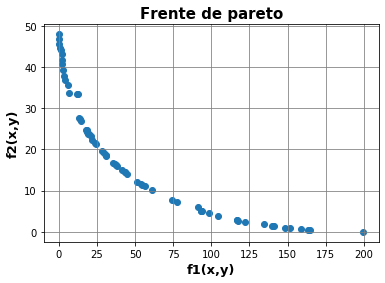

In [14]:
%%time
repeat=1
cputime=np.zeros([repeat,2])
for i in range(repeat):
    Tmax=100
    Tmin=0.00001
    N=300
    alpha=0.85
    HL=50
    SL=100
    nof=2
    nov=2
    start=time.time()
    archive1=coannealing(Tmax,Tmin,N,alpha,SL,HL,nof,nov)
    end=time.time()
    plotf(archive1,nof, i)
    cputime[i][0]=end-start
    cputime[i][1]=cputime[i][0]/60
    np.savetxt(str(i)+"tempo.csv", cputime, delimiter=",")
    print("interação:", i, ".....")
    #np.savetct(i"-"+"f1-f2.csv", sol, delimiter=",")